# DSCI100 Project Proposal: Heart Disease Diagnosis Classification

## 1. Introduction

**Heart disease** refers to a range of conditions affecting the heart, including coronary artery disease (CAD), atherosclerosis, and peripheral artery disease (Cleveland Clinic, 2023). In 2020, heart disease caused 53,704 deaths in Canada, making it the second leading cause of death, while stroke, another heart-related issue, caused 13,695 deaths. These numbers surpass deaths from COVID-19 (16,151) that year (Statistics Canada, 2022). Understanding how factors like age, cholesterol levels, and resting blood pressure affect the likelihood of a heart disease diagnosis can help in early diagnosis and prevention, potentially saving lives.

I will be answering the following question:

#### Can cholesterol levels, age, and resting blood pressure be used to accurately predict the likelihood of a heart disease diagnosis in patients?

I will be using the Cleveland dataset from UCI's Heart Disease database. It contains information from 302 patients across 14 categorical and numerical variables. For the purposes of this analysis I will be focusing on the following variables:
 - Age (age), in years
 - Cholesterol (chol), in mg/dl
 - Resting blood pressure (trestbps), in mmHg
 - Diagnosis (num), where values 1-4 correspond to a positive diagnosis, and 0 corresponds to a negative diagnosis

## 2. Preliminary Exploratory Data Analysis

In [6]:
library(tidyverse)
library(data.table)
library(tidymodels)
set.seed(10)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ data.table::between()   masks dplyr::between()
✖ scales::discard()       masks purrr::discard()
✖ dplyr::filter()         masks stats::filter()
✖ data.table::first()     masks dplyr::first()
✖ recipes::fixed()        masks stringr::fixed()
✖ dplyr::lag()            masks stats::lag()
✖ data.table::last()      masks dplyr::last()
✖ yardstick::spec()       masks readr::spec()
✖ recipes::step()         masks stats::step()
✖ data.table::transpose() masks purrr::transpose()
• Learn how to get started at https://www.tidymodels.org/start/



In [8]:
# Demonstrate that the dataset can be read from the web into R 

cleveland <- read_csv("processed.cleveland.data")

# Clean and wrangle your data into a tidy format
# Here, I am assigning column names from the UCI Heart Disease Database webpage,
# and making the categorical variables into factor types.

cols <- c("age", "sex", "cp", "trestbps", 
             "chol", "fbs", "restecg", "thalach", 
             "exang", "oldpeak", "slope", "ca", 
             "thal", "num")
colnames(cleveland) <- cols
cleveland <- cleveland |> mutate(
                    sex = as.factor(sex),
                    cp = as.factor(cp),
                    fbs = as.factor(fbs),
                    restecg = as.factor(restecg),
                    exang = as.factor(exang),
                    slope = as.factor(slope),
                    thal = as.factor(thal),
                    num = as.factor(num))

# Since the variable we are classifying is 'num', the diagnosis of heart disease, 
# we must separate positive diagnoses (1-4) from negative diagnoses (0).
# I will also rename the 'num' column to 'diagnosis' to make it more readable.

cleveland <- cleveland |>
    mutate(num = fct_recode(num, "Positive" = "1", "Positive" = "2", 
                            "Positive" = "3", "Positive" = "4", 
                            "Negative" = "0")) |>
    setnames("num", "diagnosis")

# Now we split the data into training and testing data

cleveland_split <- initial_split(cleveland, prop = 0.8, strata = diagnosis)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)
cleveland_train

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,Negative
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,Negative
56,0,2,140,294,0,2,153,0,1.3,2,0.0,3.0,Negative
44,1,2,120,263,0,0,173,0,0.0,1,0.0,7.0,Negative
52,1,3,172,199,1,0,162,0,0.5,1,0.0,7.0,Negative
57,1,3,150,168,0,0,174,0,1.6,1,0.0,3.0,Negative
54,1,4,140,239,0,0,160,0,1.2,1,0.0,3.0,Negative
48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0,Negative


### Summary Table

This table shows, organized by 'diagnosis':
 - the number of observations
 - the means of 'trestbps', 'age', and 'chol'
 - the number of rows with missing data

In [10]:
# I am also adding a totals row with the total number of observations, the means for 'trestbps', 'age', and 'chol' 
# for the whole training dataset, and the total number of missing observations.

summary_cleveland <- cleveland_train |>
    group_by(diagnosis) |>
    summarize(num_of_obs = n(),
              mean_trestbps = mean(trestbps),
              mean_age = mean(age),
              mean_chol = mean(chol),
              missing_data = sum(is.na(cleveland)))

summary_cleveland <- summary_cleveland |>
    add_row(diagnosis = "Total", 
            num_of_obs = sum(summary_cleveland$num_of_obs),
            mean_trestbps = mean(cleveland$trestbps),
            mean_age = mean(cleveland$age),
            mean_chol = mean(cleveland$chol),
            missing_data = sum(summary_cleveland$missing_data))
summary_cleveland

diagnosis,num_of_obs,mean_trestbps,mean_age,mean_chol,missing_data
<chr>,<int>,<dbl>,<dbl>,<dbl>,<int>
Negative,130,129.1231,52.76154,241.6692,0
Positive,111,135.5586,56.77477,250.0090,0
Total,241,131.6457,54.41060,246.7384,0


### Preliminary Visualization

These histograms show the distributions of the 3 predictor variables, using color to differentiate the diagnoses.

In [12]:
options(repr.plot.width = 6, repr.plot.height = 4)

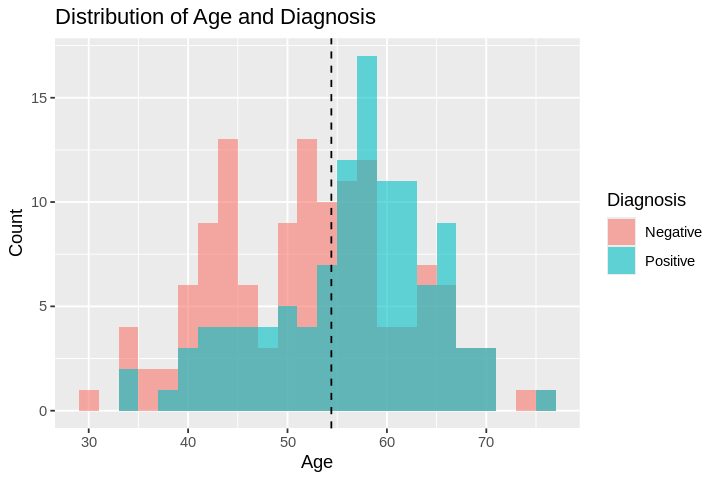

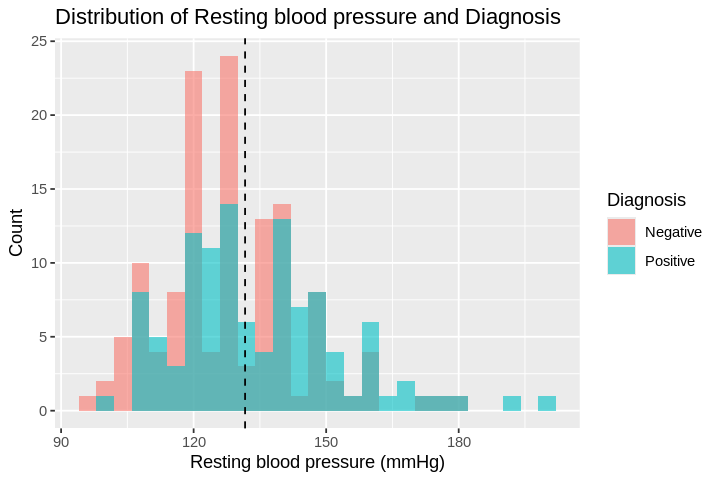

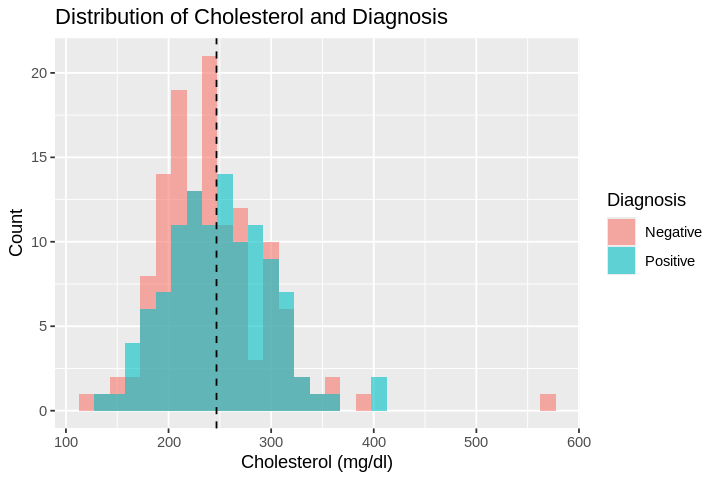

In [14]:
age_histogram <- cleveland_train |>
    ggplot(aes(x = age, fill = diagnosis)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 2) + 
    geom_vline(xintercept = mean(cleveland$age), linetype = "dashed") +
    labs(x = "Age", y = "Count", fill = "Diagnosis", title = "Distribution of Age and Diagnosis")

trestbps_histogram <- cleveland_train |>
    ggplot(aes(x = trestbps, fill = diagnosis)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 4) + 
    geom_vline(xintercept = mean(cleveland$trestbps), linetype = "dashed") +
    labs(x = "Resting blood pressure (mmHg)", y = "Count", fill = "Diagnosis", title = "Distribution of Resting blood pressure and Diagnosis")

chol_histogram <- cleveland_train |>
    ggplot(aes(x = chol, fill = diagnosis)) +
    geom_histogram(alpha = 0.6, position = "identity", binwidth = 15) + 
    geom_vline(xintercept = mean(cleveland$chol), linetype = "dashed") +
    labs(x = "Cholesterol (mg/dl)", y = "Count", fill = "Diagnosis", title = "Distribution of Cholesterol and Diagnosis")

age_histogram
trestbps_histogram
chol_histogram

## 3. Methods

*Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?*

*Describe at least one way that you will visualize the results.*

First, I will split the training data into training and validation sets to ensure robust model evaluation. I will use the K-nearest neighbors (KNN) classification model for prediction. To optimize the model, I will tune the parameter 'k' using cross-validation. I will evaluate different values of 'k' to identify the one that provides the best performance. To assess model effectiveness, I will calculate metrics such as accuracy, precision, and recall. This will help determine how well the KNN model predicts heart disease diagnoses.

## 4. Expected Outcomes and Significance

*What do you expect to find?*

*What impact could such findings have?*

*What future questions could this lead to?*

## 5. References

 - Cleveland Clinic. (2023, November 6). _Heart Disease._ Retrieved June 1, 2024, from https://my.clevelandclinic.org/health/diseases/24129-heart-disease

 - Statistics Canada. (2022, February 10). _Heart and stroke month._ Retrieved June 1, 2024, from https://www.statcan.gc.ca/o1/en/plus/353-heart-and-stroke-month

In [16]:
# figure out what to do for methods
# intro: 193 words